# Worksheet: Facial point prediction
This sheet is to help you understand loading in a dataset, prprocessing and augmentation of data, modelling and predicting, and using this knowledge for fun!



This worksheet was written by Dexter Shepherd, any inquiries please email d.r.shepherd@sussex.ac.uk

In [2]:
# First of all we must import and download all the necessary libraries
import numpy as np #the python maths library 
import cv2 #python computer vision library
import matplotlib.pyplot as plt #so we can visualise easily
import pandas as pd #data processing library
from sklearn import preprocessing #for preprocessing our data

## Part A: Understanding the basics
You might already be confident with Python, so you will breeze through this. But make sure to complete this section, as you will need to understand the basics of image plotting and numpy to continue...

### Numpy
Numpy is the maths library for python. It is much more efficient than using lists, and makes it easier to perform mathematical operations across your data
#### Arrays

In [11]:
#lets make an empty array
boring_array=[0,0,0,0,0,0,0,0,0]
cool_array=np.zeros((9,))

print(boring_array,cool_array)

#now we want to change the first element to 1
boring_array[0]=1
cool_array[0]=1
print("Add one to index:",boring_array,cool_array)

#simple right? WHat if we want to add one to all the items in the array
for i in range(len(boring_array)):
    boring_array[i]+=1
cool_array+=1
print("Add one to add:",boring_array,cool_array)

#now you are starting to see the ease of using numpy... lets look at a better example, what if we want to make sure all items above one are capped to one
for i in range(len(boring_array)):
    if boring_array[i]>1:
        boring_array[i]=1
cool_array[cool_array>1]=1
print("Cap values:",boring_array,cool_array)



[0, 0, 0, 0, 0, 0, 0, 0, 0] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Add one to index: [1, 0, 0, 0, 0, 0, 0, 0, 0] [1. 0. 0. 0. 0. 0. 0. 0. 0.]
Add one to add: [2, 1, 1, 1, 1, 1, 1, 1, 1] [2. 1. 1. 1. 1. 1. 1. 1. 1.]
Cap values: [1, 1, 1, 1, 1, 1, 1, 1, 1] [1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Matrices
Arrays are one thing, but what about matrices?

In [17]:
#we have already established that numpy is more efficient at doing tasks, lets look at matrices
boring_array=[[1 for i in range(5)] for i in range(5)]
cool_array=np.ones((5,5))
print(boring_array,"\n\n",cool_array)

#gathering elements is exactly the same
print("Items:",boring_array[0][0],cool_array[0][0])
#or gathhering rows
print("Rows:",boring_array[0],cool_array[0])
#what if we gather coloumns
print("Columns:", [boring_array[i][0] for i in range(5)],cool_array[:,0])

#When it gets to more complex operations.... then it gets more efficient to use numpy
#We can also generate random arrays

random_matrix=np.random.random((2,2)) #random decimals
print("Random:",random_matrix)

mean=0
std=0.3
gaussian_matrix=np.random.normal(mean,std,(2,2)) #gaussian (normal distribution)
print("Gaussian:",gaussian_matrix)



[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]] 

 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Items: 1 1.0
Rows: [1, 1, 1, 1, 1] [1. 1. 1. 1. 1.]
Columns: [1, 1, 1, 1, 1] [1. 1. 1. 1. 1.]
Random: [[0.91202515 0.94770147]
 [0.35769791 0.10037891]]
Random: [[-0.43467573 -0.23395845]
 [ 0.13058063  0.02388685]]


### Matplotlib
Matplotlib is the plotting library for making graphs and showing images. It is widely used in the field

#### Showing data
The graph you use will depend on your data, here are some examples

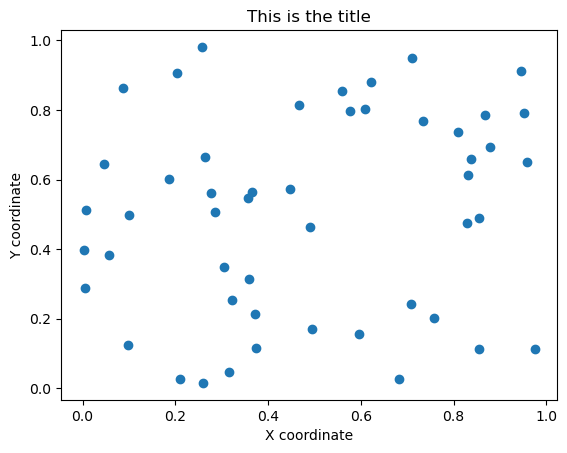

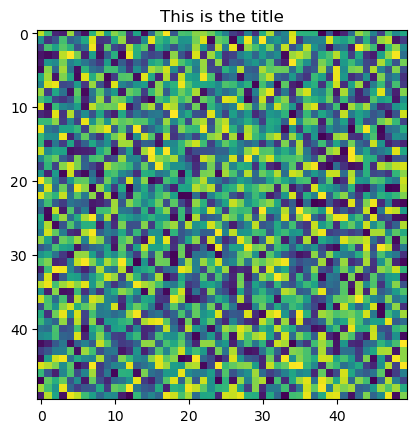

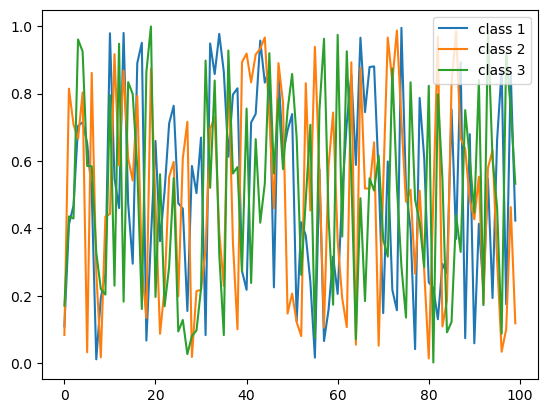

In [30]:
coordinates=np.random.random((50,2)) #stored in format [(x,y),(x,y)]
plt.scatter(coordinates[:,0],coordinates[:,1]) #grab x column and y column
plt.title("This is the title")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()

#we can also show images
image=np.random.random((50,50)) #simage of 50 x 50 pixels
plt.imshow(image)
plt.title("This is the title")
plt.show()

#labelling coordinates is another feature
data=np.random.random((100,3)) #3 classes, 100 data points
plt.plot(data,label=["class 1","class 2","class 3"])
plt.legend(loc="upper right")
plt.show()

## Part B: The dataset
A dataset is a collection of related data. For example a collection of pictures of different kinds of flowers would be a dataset. Datasets are not limited to images, they could be readings from a sensor such as weather data. The foundations of machine learning requires data! If you want a model to tell you what the weather will be like in 5 days then you will need a lot of weather data that your model can find patterns in.

The dataset used is from Kaggle https://www.kaggle.com/code/drgilermo/exploring-the-images-and-facial-landmarks/notebook

### Loading in a dataset

In [10]:
# load the dataset
face_images_db = np.load('../dataset/face_images.npz')['face_images']
facial_keypoints_df = pd.read_csv('../dataset/facial_keypoints.csv')

(im_height, im_width, num_images) = face_images_db.shape
num_keypoints = facial_keypoints_df.shape[1] / 2

print('number of images = %d' %(num_images))
print('image dimentions = (%d,%d)' %(im_height,im_width))
print('number of facial keypoints = %d' %(num_keypoints))

number of images = 7049
image dimentions = (96,96)
number of facial keypoints = 15


### Visualising the data

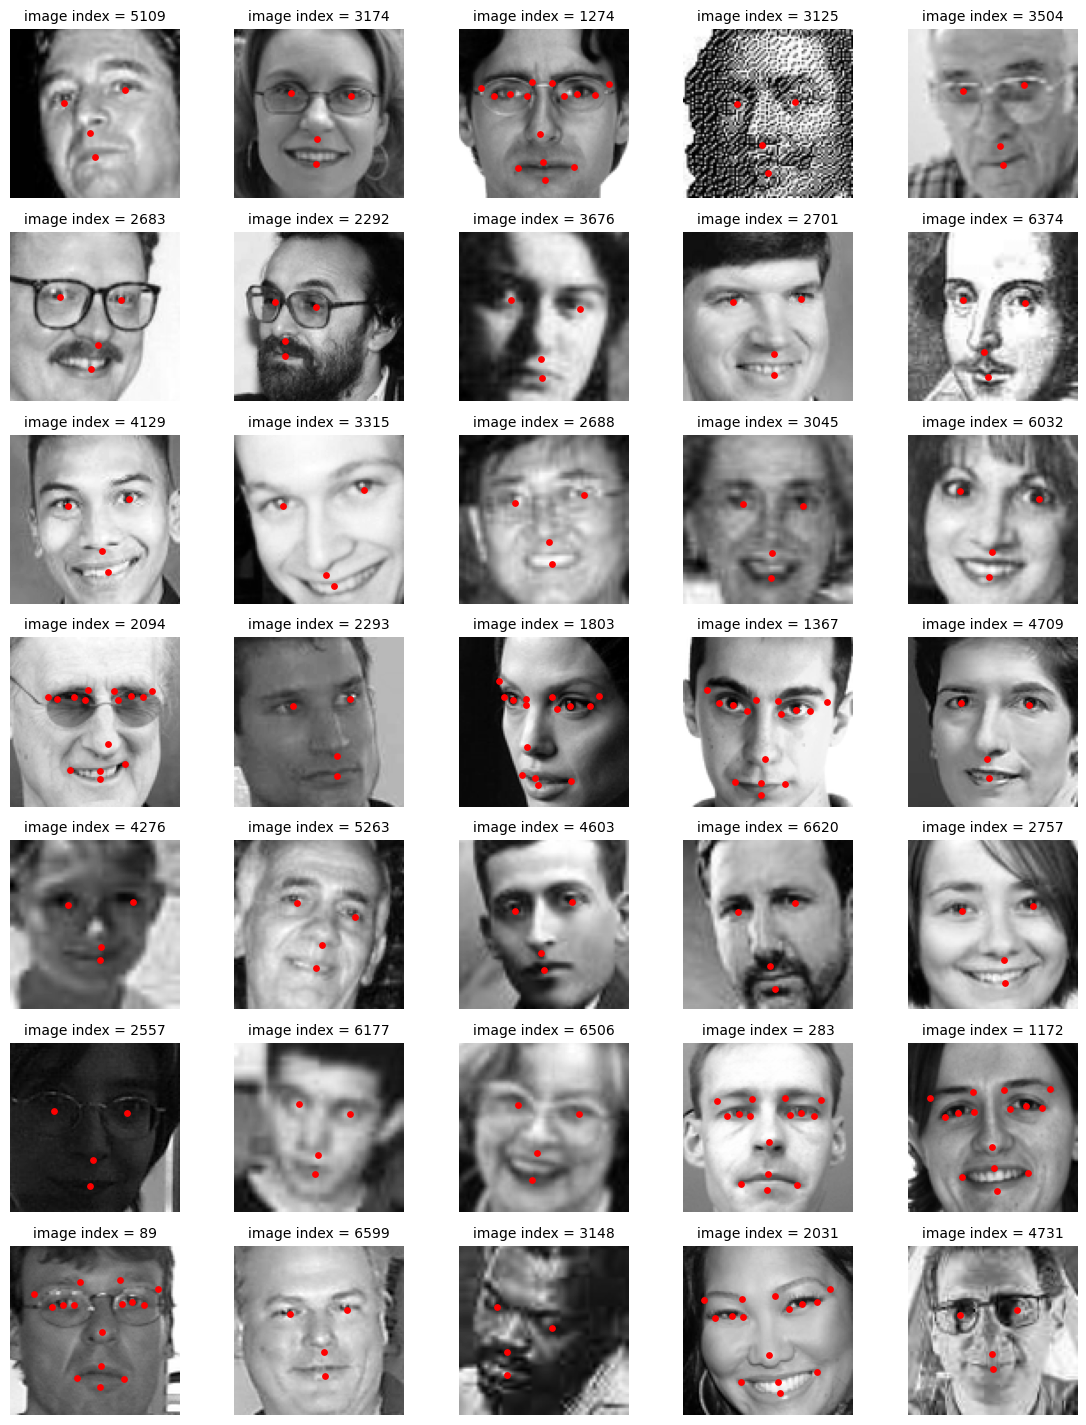

In [11]:
num_fig_rows = 7
num_fig_cols = 5

num_plots = num_fig_rows * num_fig_cols

rand_inds_vec = np.random.choice(face_images_db.shape[2],num_plots,replace=False)
rand_inds_mat = rand_inds_vec.reshape((num_fig_rows,num_fig_cols))

plt.close('all')
fig, ax = plt.subplots(nrows=num_fig_rows,ncols=num_fig_cols,figsize=(14,18))

for i in range(num_fig_rows):
    for j in range(num_fig_cols):
        curr_ind = rand_inds_mat[i][j]
        curr_image = face_images_db[:,:,curr_ind]
    
        x_feature_coords = np.array(facial_keypoints_df.iloc[curr_ind,0::2].tolist())
        y_feature_coords = np.array(facial_keypoints_df.iloc[curr_ind,1::2].tolist())
    
        ax[i][j].imshow(curr_image, cmap='gray');
        ax[i][j].scatter(x_feature_coords,y_feature_coords,c='r',s=15)
        ax[i][j].set_axis_off()
        ax[i][j].set_title('image index = %d' %(curr_ind),fontsize=10)

#### Task 1:
You may notice that the data has different numbers of points, which will make modelling it complicated. Quite often datasets have issues which require us to "clean" them. 
Write code that loops through the dataset and only keeps the images and points
Store this in an array X (images) and array y (labels). They should both end up the same size

In [ ]:
#loop through the dataset

#get the image and points for each item in data

#if the number of points is equal to the number we want keep it else discard it

#convert the gathered datasets to numpy

#### Task 2:
Visualise these images as average pixels in a histogram. Is there anything you notice? We have left some example code.

The reason we do this is to see how much our dataset differs from one another.

We expect to see our graph look like a Gaussian (bell shaped curve) that show most images are have similar pixel intensity. 

<b> Extension </b> Find which images are outleirs, do you notice anything about the super dark or super light images? DO you think this could impact your models ability to predict?

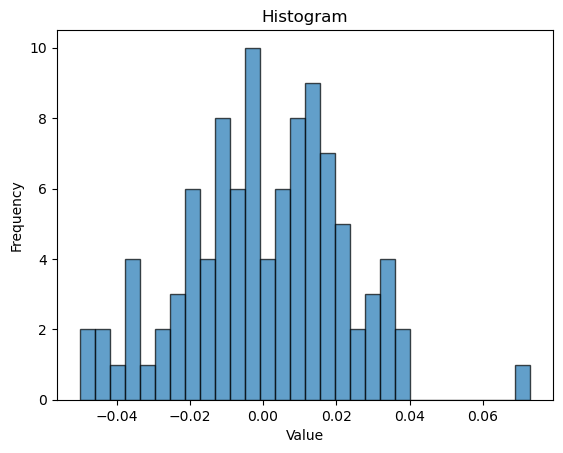

In [8]:

#gather all the average 
example_images=np.random.normal(0,10,(100,250,250,3)) #example 100 iamges
example_images=example_images.reshape((100,250*250*3)) #flatten it into flat images
averages=np.average(example_images,axis=1) #find average of each image (rather than all images)


# Create histogram
plt.hist(averages, bins=30, edgecolor='black', alpha=0.7) #30 bins

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()


### Preprocessing the data
In machine learning we typically preprocess data to make it fit better in a model. Some has been done for you, such as the images all being the same size. 

Read this article that explains more detail about different preprocessing techniques
https://scikit-learn.org/stable/modules/preprocessing.html

#### Task 3:
What techniques could we apply to our data? Play around with different techniques, visualise it in histograms. Are there any trends you notice? Make sure not to overwrite your dataset variables

#### Task 4:
Data preprocessing is not limited to the above. There are some , more on the image side. Let's say you take a photo of you on the beach and put it on social media, you might use a filter to make it look sunnier. This can be done on your dataset to make them clearer. How does this affect your dataset?

Info on filters:



We have done one example for you, something called a sobel filter

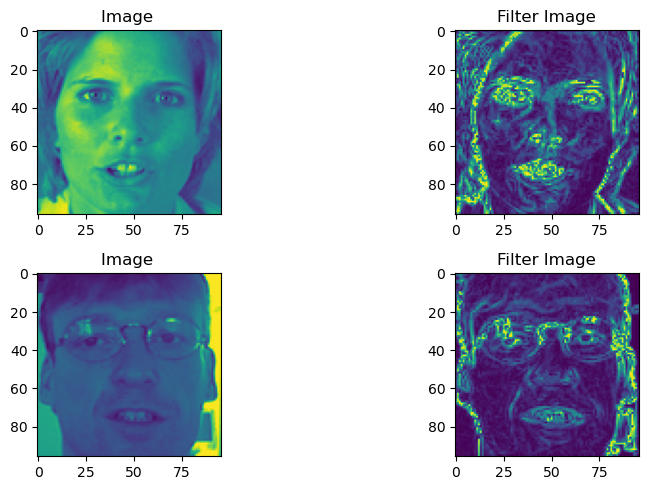

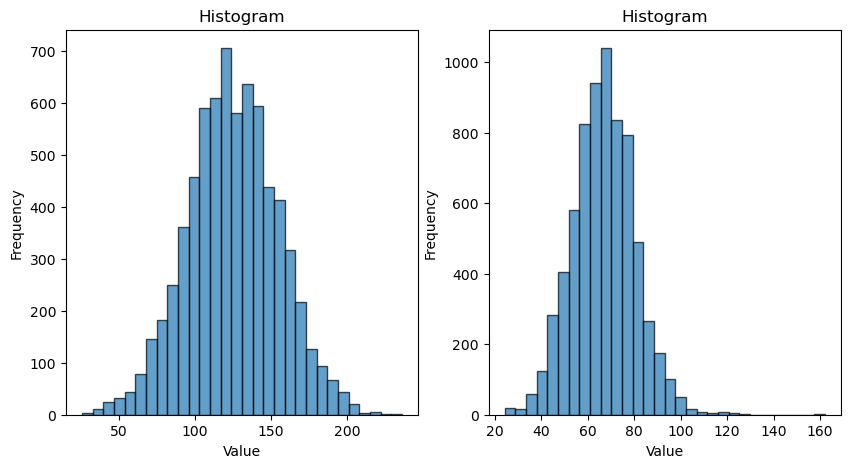

In [22]:
def applySobel(image):
    # Apply Sobel filter in x-direction
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # ksize=3 for a 3x3 Sobel kernel

    # Apply Sobel filter in y-direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Convert the results back to uint8
    sobel_x = np.uint8(np.absolute(sobel_x))
    sobel_y = np.uint8(np.absolute(sobel_y))

    # Combine the results to get the final edge-detected image
    sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)
    return sobel_combined

demo_image1=face_images_db[:,:,np.random.randint(0,100)]
demo_image2=face_images_db[:,:,np.random.randint(0,100)]

plt.figure(figsize=(10, 5))

# Plot first image
plt.subplot(2, 2, 1)
plt.imshow(demo_image1)
plt.title('Image ')

# Plot second image
plt.subplot(2, 2, 2)
plt.imshow(applySobel(demo_image1))
plt.title('Filter Image')

# Plot first image
plt.subplot(2, 2, 3)
plt.imshow(demo_image2)
plt.title('Image ')

# Plot second image
plt.subplot(2, 2, 4)
plt.imshow(applySobel(demo_image2))
plt.title('Filter Image')

# Adjust spacing
plt.tight_layout()

# Show plot
plt.show()

# apply to whole dataset to see how this looks as a histogram
transposed=face_images_db.T
data=np.zeros_like(transposed)
plt.figure(figsize=(10, 5))

#apply filter
for i in range(len(transposed)):
    data[i]=applySobel(transposed[i])

# Plot first hist
plt.subplot(1, 2, 1)
transposed_flat=transposed.reshape((len(transposed),96*96)) #flatten it into flat images
averages=np.average(transposed_flat,axis=1) #find average of each image (rather than all images)
plt.hist(averages, bins=30, edgecolor='black', alpha=0.7) #30 bins
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
#plot second
plt.subplot(1, 2, 2)
data=data.reshape((len(data),96*96)) #flatten it into flat images
averages=np.average(data,axis=1) #find average of each image (rather than all images)
plt.hist(averages, bins=30, edgecolor='black', alpha=0.7) #30 bins
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()